# Importing Needed Libraries

In [15]:
from sqlalchemy import create_engine # to feach the data form database
import pandas as pd # to manipulate the data as dataframe
import matplotlib.pyplot as plt # for plotting
import numpy as np# to manipulate the data
import datetime
import seaborn as sns

# Allows the visuals to render within  Jupyter Notebook

In [2]:
# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

# Read Data from\ SQLite Database

In [3]:
# data for database sql
engine = create_engine("sqlite:///EDA_Project_db.db")
all_tables = engine.table_names()
print(all_tables)

['Turnstiles']


In [4]:
Turnstiles_data = pd.read_sql('SELECT * FROM Turnstiles;', engine)
Turnstiles_data

,C_A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS ...
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/07/2021,00:00:00,REGULAR,0007614946,0002604740 ...
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/07/2021,04:00:00,REGULAR,0007614956,0002604740 ...
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/07/2021,08:00:00,REGULAR,0007614964,0002604758 ...
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/07/2021,12:00:00,REGULAR,0007615017,0002604803 ...
...,...,...,...,...,...,...,...,...,...,...,...
2722618,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/04/2021,05:00:00,REGULAR,0000005554,0000000577 ...
2722619,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/04/2021,09:00:00,REGULAR,0000005554,0000000577 ...
2722620,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/04/2021,13:00:00,REGULAR,0000005554,0000000577 ...
2722621,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/04/2021,17:00:00,REGULAR,0000005554,0000000577 ...


# Data Cleaning

In [5]:
# to drop the name of columns that came from each CSV file appended in database
Turnstiles_data[Turnstiles_data['C_A'] == 'C/A'] = None
Turnstiles_data.dropna(subset=['C_A'], inplace=True)
Turnstiles_data

,C_A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/07/2021,00:00:00,REGULAR,0007614946,0002604740 ...
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/07/2021,04:00:00,REGULAR,0007614956,0002604740 ...
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/07/2021,08:00:00,REGULAR,0007614964,0002604758 ...
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/07/2021,12:00:00,REGULAR,0007615017,0002604803 ...
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/07/2021,16:00:00,REGULAR,0007615136,0002604830 ...
...,...,...,...,...,...,...,...,...,...,...,...
2722618,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/04/2021,05:00:00,REGULAR,0000005554,0000000577 ...
2722619,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/04/2021,09:00:00,REGULAR,0000005554,0000000577 ...
2722620,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/04/2021,13:00:00,REGULAR,0000005554,0000000577 ...
2722621,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/04/2021,17:00:00,REGULAR,0000005554,0000000577 ...


In [6]:
# remove non-regular 
ide_non_REGULAR = Turnstiles_data[(Turnstiles_data["DESC"] != "REGULAR")].index
Turnstiles_data.drop(ide_non_REGULAR, inplace = True)
Turnstiles_data

,C_A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/07/2021,00:00:00,REGULAR,0007614946,0002604740 ...
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/07/2021,04:00:00,REGULAR,0007614956,0002604740 ...
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/07/2021,08:00:00,REGULAR,0007614964,0002604758 ...
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/07/2021,12:00:00,REGULAR,0007615017,0002604803 ...
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/07/2021,16:00:00,REGULAR,0007615136,0002604830 ...
...,...,...,...,...,...,...,...,...,...,...,...
2722618,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/04/2021,05:00:00,REGULAR,0000005554,0000000577 ...
2722619,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/04/2021,09:00:00,REGULAR,0000005554,0000000577 ...
2722620,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/04/2021,13:00:00,REGULAR,0000005554,0000000577 ...
2722621,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/04/2021,17:00:00,REGULAR,0000005554,0000000577 ...


In [7]:
# remove duplicate
# Get rid of the duplicate entry
Turnstiles_data.sort_values(["C_A", "UNIT", "SCP", "STATION", "DATE","TIME"], 
                          inplace=True, ascending=False)
Turnstiles_data.drop_duplicates(subset=["C_A", "UNIT", "SCP", "STATION", "DATE","TIME"], inplace=True)

In [8]:
Turnstiles_data = Turnstiles_data.reset_index()
Turnstiles_data

,index,C_A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,627729,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/27/2021,21:00:00,REGULAR,0000005554,0000000614 ...
1,627728,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/27/2021,17:00:00,REGULAR,0000005554,0000000614 ...
2,627727,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/27/2021,13:00:00,REGULAR,0000005554,0000000614 ...
3,627726,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/27/2021,09:00:00,REGULAR,0000005554,0000000614 ...
4,627725,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/27/2021,05:00:00,REGULAR,0000005554,0000000614 ...
...,...,...,...,...,...,...,...,...,...,...,...,...
2710451,2513096,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,16:00:00,REGULAR,0007578897,0002590418 ...
2710452,2513095,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,12:00:00,REGULAR,0007578789,0002590386 ...
2710453,2513094,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,08:00:00,REGULAR,0007578749,0002590340 ...
2710454,2513093,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,04:00:00,REGULAR,0007578740,0002590327 ...


# Pre-Processing

In [9]:
Turnstiles_data[["PREV_DATE", "PREV_ENTRIES","PREV_EXITS"]] = (Turnstiles_data
                                                       .groupby(["C_A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES","EXITS"]
                                                       .apply(lambda grp: grp.shift(1)))

In [10]:
# Parse needed Text columns into numeric
Turnstiles_data['ENTRIES'] = pd.to_numeric(Turnstiles_data['ENTRIES'])
Turnstiles_data['EXITS'] = pd.to_numeric(Turnstiles_data['EXITS'])
Turnstiles_data['PREV_ENTRIES'] = pd.to_numeric(Turnstiles_data['PREV_ENTRIES'])
Turnstiles_data['PREV_EXITS'] = pd.to_numeric(Turnstiles_data['PREV_EXITS'])
Turnstiles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2710456 entries, 0 to 2710455
Data columns (total 15 columns):
index           int64
C_A             object
UNIT            object
SCP             object
STATION         object
LINENAME        object
DIVISION        object
DATE            object
TIME            object
DESC            object
ENTRIES         int64
EXITS           int64
PREV_DATE       object
PREV_ENTRIES    float64
PREV_EXITS      float64
dtypes: float64(2), int64(3), object(10)
memory usage: 310.2+ MB


In [11]:
# Take the date and time fields into a single datetime column
Turnstiles_data["DATE_TIME"] = pd.to_datetime(Turnstiles_data.DATE + " " + Turnstiles_data.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [12]:

# Traffic Calculation

mta_entries = Turnstiles_data.groupby([ 'DIVISION',"STATION",'C_A', 'UNIT', 'SCP',"DATE"]).ENTRIES.max() - Turnstiles_data.groupby([ 'DIVISION',"STATION",'C_A', 'UNIT', 'SCP',"DATE"]).ENTRIES.min()
mta_exits = Turnstiles_data.groupby([ 'DIVISION',"STATION",'C_A', 'UNIT', 'SCP',"DATE"]).EXITS.max() - Turnstiles_data.groupby([ 'DIVISION',"STATION",'C_A', 'UNIT', 'SCP',"DATE"]).EXITS.min()

mta_entries = mta_entries.reset_index()
mta_exits = mta_exits.reset_index()

mta_entries_exits = pd.merge(mta_entries, mta_exits, how="outer")
mta_entries_exits["TRAFFIC"] = mta_entries_exits["ENTRIES"] + mta_entries_exits["EXITS"]


In [13]:
mta_entries_exits.groupby(["STATION"]).TRAFFIC.sum()

STATION
1 AV                 1571314
103 ST               1794015
103 ST-CORONA        1635151
104 ST                235586
110 ST                720516
                     ...    
WOODLAWN              346267
WORLD TRADE CTR    797536023
WTC-CORTLANDT        1689186
YORK ST               652041
ZEREGA AV             175893
Name: TRAFFIC, Length: 379, dtype: int64

In [14]:
print(len(mta_entries_exits["DIVISION"].unique()))
print(mta_entries_exits.groupby(["DIVISION"]).TRAFFIC.sum().count)

6
<bound method Series.count of DIVISION
BMT     506342635
IND    3923289149
IRT    3953802777
PTH      30104057
RIT        371099
SRT        282534
Name: TRAFFIC, dtype: int64>


In [ ]:
mta_entries_exits[mta_entries_exits["DIVISION"] == 'SRT'].head() #https://en.wikipedia.org/wiki/Staten_Island_Railway

In [ ]:
mta_entries_exits[mta_entries_exits["DIVISION"] == 'PTH'].head()  #https://en.wikipedia.org/wiki/23rd_Street_station_(PATH)

In [ ]:
mta_entries_exits[mta_entries_exits["DIVISION"] == 'IND'].head()  #https://en.wikipedia.org/wiki/B_Division_(New_York_City_Subway)

In [ ]:
mta_entries_exits[mta_entries_exits["DIVISION"] == 'IRT'].head()  #https://en.wikipedia.org/wiki/A_Division_(New_York_City_Subway)

In [ ]:
mta_entries_exits[mta_entries_exits["DIVISION"] == 'RIT'].head()  # https://freetoursbyfoot.com/roosevelt-island-tramway/

In [47]:
# seaborn "Outliers" Boxplot
Q1 = mta_entries_exits["TRAFFIC"].quantile(0.25)
Q3 = mta_entries_exits["TRAFFIC"].quantile(0.75)
IQR = Q3 - Q1

ide_outlier_Q1 = mta_entries_exits[(mta_entries_exits["TRAFFIC"]>((IQR *1.5)-Q1))].index
# ide_outlier_Q3 = mta_entries_exits[(mta_entries_exits["TRAFFIC"]>(Q3+(IQR *1.5)))].index
no_outlier_df_Q1 = mta_entries_exits.drop(ide_outlier_Q1)
ide_outlier_Q3 = no_outlier_df_Q1[(no_outlier_df_Q1["TRAFFIC"]>(Q3+(IQR *1.5)))].index
no_outlier_df = no_outlier_df_Q1.drop(ide_outlier_Q3)

# no_outlier_df = pd.concat([no_outlier_df_Q1 , no_outlier_df_Q3])

# group by . apply find the outliuers for each station
# plot for eash station seaborn
no_outlier_df

,DIVISION,STATION,C_A,UNIT,SCP,DATE,ENTRIES,EXITS,TRAFFIC
85,BMT,1 AV,H007,R248,00-00-00,08/22/2021,142,764,906
176,BMT,1 AV,H007,R248,00-00-01,08/22/2021,294,464,758
182,BMT,1 AV,H007,R248,00-03-00,05/29/2021,48,204,252
183,BMT,1 AV,H007,R248,00-03-00,05/30/2021,35,186,221
184,BMT,1 AV,H007,R248,00-03-00,05/31/2021,24,175,199
...,...,...,...,...,...,...,...,...,...
454191,SRT,TOMPKINSVILLE,S102,R165,00-05-01,08/23/2021,0,0,0
454192,SRT,TOMPKINSVILLE,S102,R165,00-05-01,08/24/2021,2,0,2
454193,SRT,TOMPKINSVILLE,S102,R165,00-05-01,08/25/2021,0,0,0
454194,SRT,TOMPKINSVILLE,S102,R165,00-05-01,08/26/2021,0,0,0


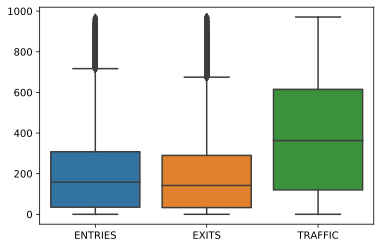

In [48]:
sns.boxplot(data=no_outlier_df_Q3)

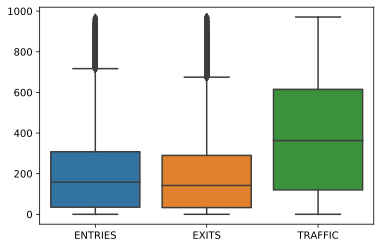

In [49]:
plot = sns.boxplot(data=no_outlier_df)
plot.set_ylabel('TRAFFIC')
plot.set_title("TRAFFIC in each DIVISION")

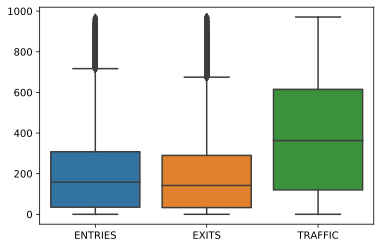

In [50]:
sns.boxplot(data=no_outlier_df_Q1)

# Ploting

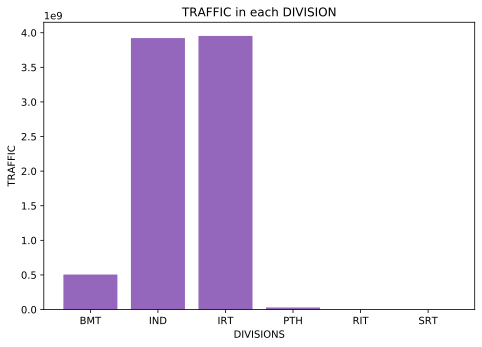

In [38]:
# TRAFFIC in each DIVISION Plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
STATION = mta_entries_exits["DIVISION"].unique()
TRAFFIC = mta_entries_exits.groupby(["DIVISION"]).TRAFFIC.sum()
ax.bar(STATION,TRAFFIC, color ='tab:purple')
# ax.spines['bottom'].set_color('white')
# ax.spines['top'].set_color('white') 
# ax.spines['right'].set_color('white')
# ax.spines['left'].set_color('white')
ax.tick_params(axis='x')
ax.tick_params(axis='y')
plt.xlabel('DIVISIONS')
plt.ylabel('TRAFFIC')
plt.title("TRAFFIC in each DIVISION")
plt.show()

In [53]:
dction = {
    'BMT': 1,
    'IND': 2,
    'IRT': 3,
    'PTH': 4,
    'RIT':5,
    'SRT': 6
}
mta_entries_exits["DIVISION"] = mta_entries_exits.DIVISION.map(dction)

corr = mta_entries_exits.corr()


In [54]:
corr

,DIVISION,ENTRIES,EXITS,TRAFFIC
DIVISION,1.000000,0.000800,0.000155,0.000488
ENTRIES,0.000800,1.000000,0.689578,0.903686
EXITS,0.000155,0.689578,1.000000,0.933266
TRAFFIC,0.000488,0.903686,0.933266,1.000000


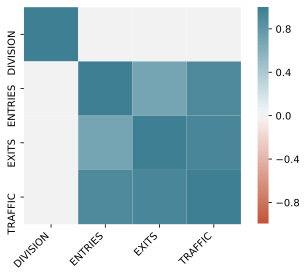

In [55]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);